In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Ahmed Ashraf\Desktop\Top 100 Healthiest Food in the World.csv")

# Display the first few rows of the dataset
df.head()


,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515


# Step 3: Data Preprocessing


In [3]:
#Handle Missing Values
df_cleaned = df.dropna()


In [4]:
#We create a new feature called 'Health_Score' that combines key nutritional elements.
df_cleaned['Health_Score'] = (df_cleaned['Protein (g)'] * 2 + df_cleaned['Fiber (g)'] * 1.5 + 
                              df_cleaned['Vitamin C (mg)'] + df_cleaned['Antioxidant Score'] / 100) / df_cleaned['Calories']


In [5]:
#Encode Categorical Features
df_cleaned['Originated From'] = LabelEncoder().fit_transform(df_cleaned['Originated From'])


In [6]:
#Classify Foods into Nutrition Levels
median_health_score = df_cleaned['Health_Score'].median()
df_cleaned['Nutrition_Level'] = np.where(df_cleaned['Health_Score'] > median_health_score, 1, 0)


# Step 4: Exploratory Data Analysis


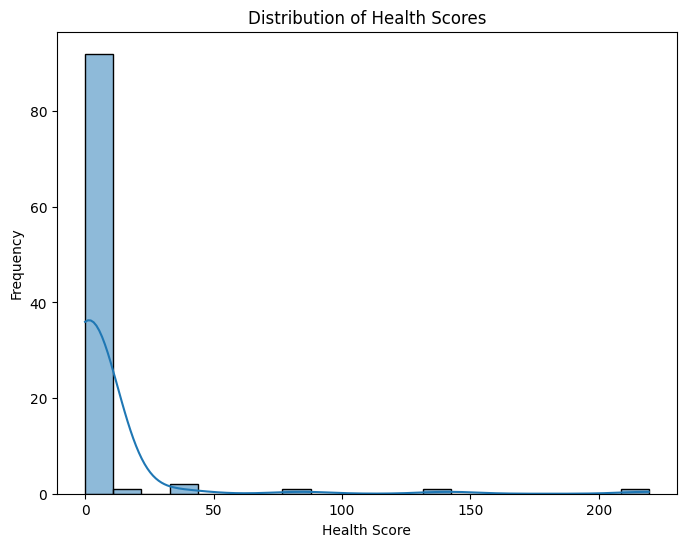

In [7]:
#Health Score Distribution
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['Health_Score'], bins=20, kde=True)
plt.title('Distribution of Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()


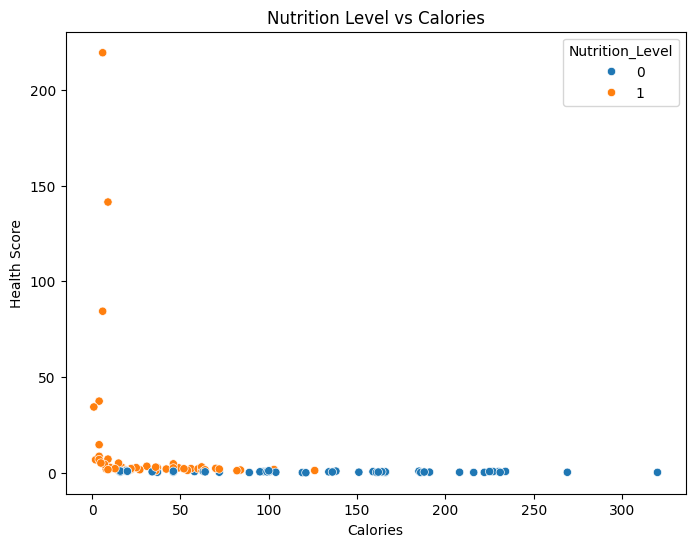

In [9]:
#Nutrition Level vs. Calories
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Calories', y='Health_Score', hue='Nutrition_Level')
plt.title('Nutrition Level vs Calories')
plt.xlabel('Calories')
plt.ylabel('Health Score')
plt.show()


# Step 5: Train-Test Split and Standardization


In [10]:
features = ['Calories', 'Protein (g)', 'Fiber (g)', 'Vitamin C (mg)', 'Antioxidant Score', 'Originated From']
X = df_cleaned[features]
y = df_cleaned['Nutrition_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 6: Build a RandomForest Classifier


In [11]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Moderately Nutritious', 'Highly Nutritious'])

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)


Accuracy: 85.00%
                       precision    recall  f1-score   support

Moderately Nutritious       0.75      0.86      0.80         7
    Highly Nutritious       0.92      0.85      0.88        13

             accuracy                           0.85        20
            macro avg       0.83      0.85      0.84        20
         weighted avg       0.86      0.85      0.85        20



# Step 7: Feature Importance Visualization


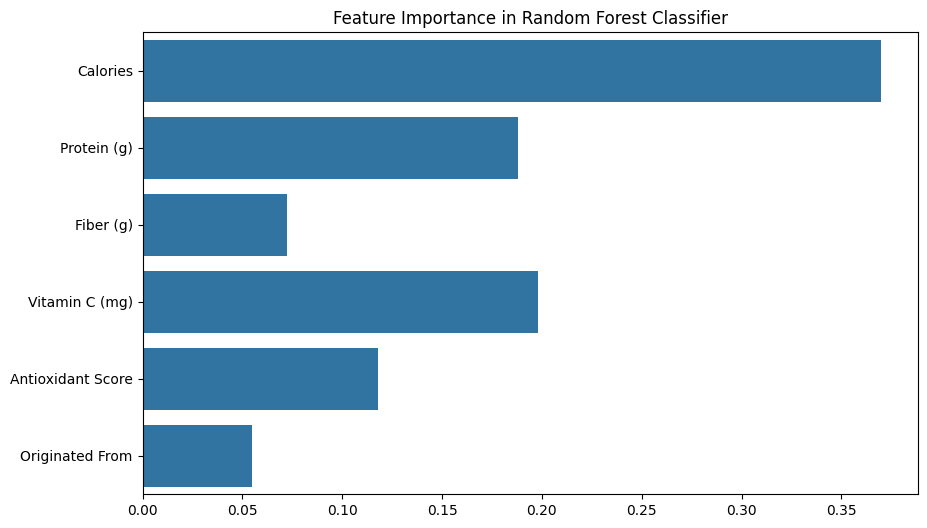

In [12]:
plt.figure(figsize=(10,6))
feature_importance = rf_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()
